In [93]:
# _*_ coding: utf-8 _*_
# 程式 10-1.py (Python 3 version)

import sqlite3
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as pt

def fetch_data():
    url = 'http://new.cpc.com.tw/division/mb/oil-more4.aspx'

    html = requests.get(url).text
    sp = BeautifulSoup(html, 'html.parser')
    data = sp.find_all('span', {'id':'Showtd'})
    rows = data[0].find_all('tr')

    global prices,oildate
    prices = list()
    oildate=list()
    for row in rows:
        cols = row.find_all('td')
        if len(cols[1].text) > 0 and cols[0].text>'2017/01/01':
            item =  float(cols[2].text)
            prices.append(item)
            item = [cols[0].text]
            oildate.append(item)
            item = [cols[0].text, float(cols[2].text)]
    
    print(prices)
    return        
    for p in prices:
        sqlstr = "select * from prices where gdate='{}';".format(p[0])
        cursor = conn.execute(sqlstr)
        if len(cursor.fetchall()) == 0:
            g92 = 0 if p[1]=='' else float(p[1])
            g95 = 0 if p[2]=='' else float(p[2])
            g98 = 0 if p[3]=='' else float(p[3])
            sqlstr = "insert into prices values('{}', {}, {}, {});". \
                format(p[0], g92, g95, g98)
            print(sqlstr)
            conn.execute(sqlstr)
            conn.commit()


def disp_10data():
    cursor = conn.execute('select * from prices order by gdate desc;')
    n = 0
    for row in cursor:
        print("日期：{}，92無鉛：{}，95無鉛：{}，98無鉛：{}". \
            format(row[0],row[1],row[2],row[3]))
        n = n + 1
        if n == 10:
            break


def disp_alldata():
    cursor = conn.execute('select * from prices order by gdate desc;')
    n = 0
    for row in cursor:
        print("日期：{}，92無鉛：{}，95無鉛：{}，98無鉛：{}". \
            format(row[0],row[1],row[2],row[3]))
        n = n + 1
        if n == 20:
            x = input("請按Enter鍵繼續...(Q:回主選單)")
            if x == 'Q' or x == 'q': break
            n = 0



fetch_data()
 


[26.8, 26.6, 26.4, 26.7, 26.3, 26.0, 25.8, 25.4, 25.3, 25.1, 25.4, 24.9, 24.7, 24.4, 24.7, 24.3, 24.0, 24.3, 24.5, 25.0, 25.6, 25.4, 24.9, 25.2, 25.7, 26.2, 25.8, 25.2, 25.1, 25.3, 26.1, 26.4, 26.3, 26.4, 26.5, 26.4, 26.5, 26.8]


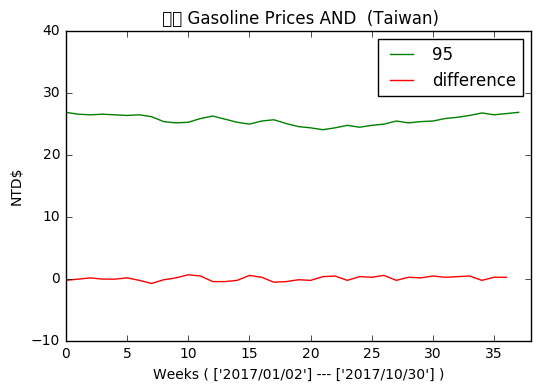

-0.3 -0.1


In [118]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as pt

def fetch_data():
    url = 'http://new.cpc.com.tw/division/mb/oil-more4.aspx'

    html = requests.get(url).text
    sp = BeautifulSoup(html, 'html.parser')
    data = sp.find_all('span', {'id':'Showtd'})
    rows = data[0].find_all('tr')

    global prices,oildate
    prices = list()
    oildate=list()
    for row in rows:
        cols = row.find_all('td')
        if len(cols[1].text) > 0 and cols[0].text>'2017/01/01':
            item =  float(cols[2].text)
            prices.append(item)
            item = [cols[0].text]
            oildate.append(item)
            item = [cols[0].text, float(cols[2].text)]
def chart():
    
    w = oildate[::-1]
    
    y = prices[::-1]
    
    x = np.arange(0,len(w))
    global c
    c=np.diff(y)
    x2=np.arange(0,len(c))
    pt.ylabel("NTD$")
    pt.xlabel("Weeks ( {} --- {} )".format(w[0], w[-1]))
    pt.plot(x, y, color="green", label="95")
    pt.plot(x2, c, color="red", label="difference")
    pt.xlim(0,len(w))
    pt.ylim(-10,40)
    pt.title(" Gasoline Prices AND  (Taiwan)")
    pt.legend()
    pt.show()
#for i in range(10):
#  print(prices[i])
import numpy as np
a=np.random.rand(10)
chart()
print(c[0],c[1])


In [110]:
print("0=",prices[0])
print("1=",prices[1])
print("-1=",prices[-1])



0= 26.8
1= 26.6
-1= 26.8
